In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [61]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [62]:
df.shape

(962, 2)

exploration of data

In [63]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

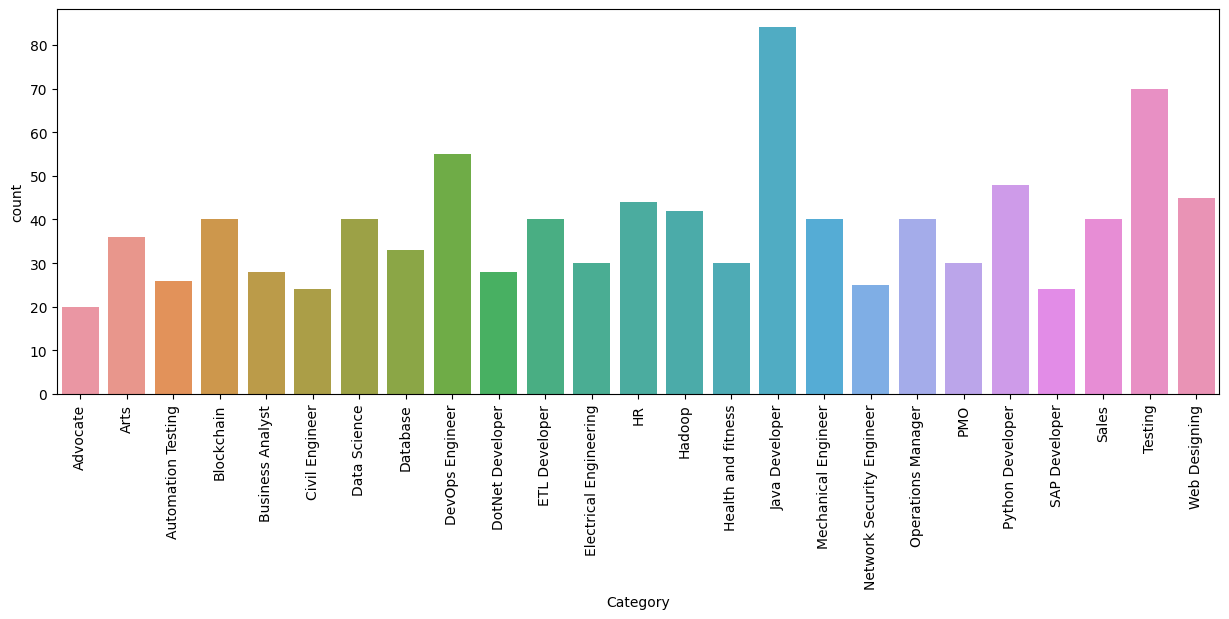

In [64]:
df['Category'] = pd.Categorical(df['Category'])
plt.figure(figsize = (15,5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

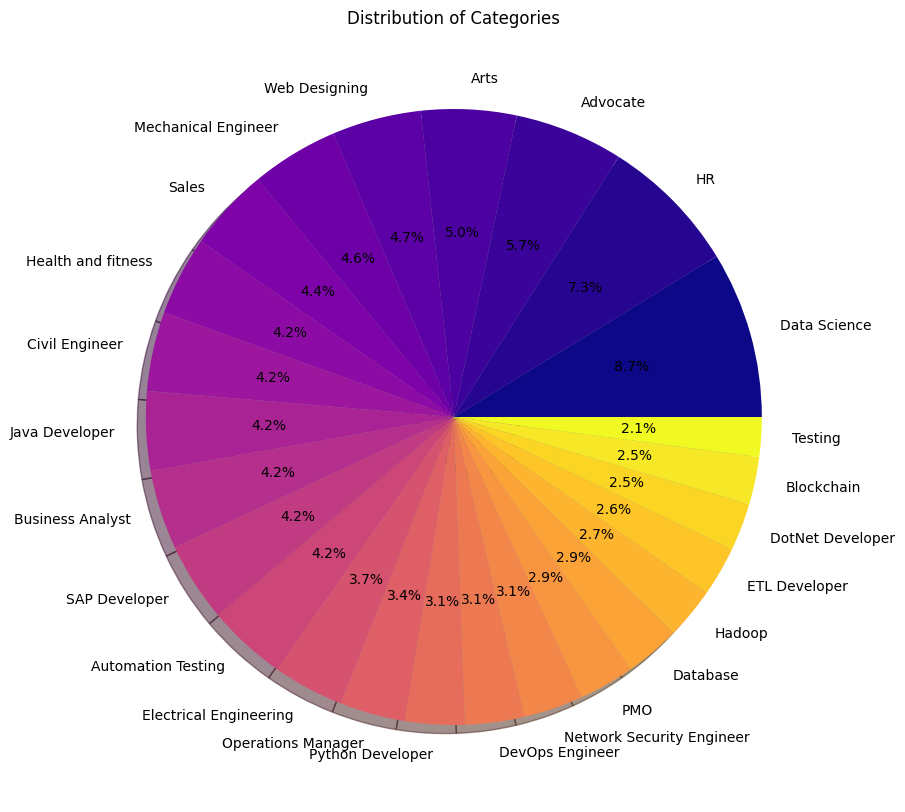

In [65]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()

colors = plt.cm.plasma(np.linspace(0, 1, len(labels)))

plt.figure(figsize=(20, 10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", shadow=True, colors=colors)

plt.title("Distribution of Categories")
plt.show()

exploring

In [66]:
df['Category'][0]

'Data Science'

In [67]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [68]:
import re

def cleanResume(txt):
  # Remove null values
  cleanText = re.sub(r'null', ' ', txt, flags=re.IGNORECASE)  # Case-insensitive

  # Remove URLs
  cleanText = re.sub(r'http\S+\s', ' ', cleanText)

  # Remove email addresses
  cleanText = re.sub(r'@\S+', ' ', cleanText)
  cleanText = re.sub(r'\r\n', ' ', cleanText)

  # Remove hashtags
  cleanText = re.sub(r'#\S+', ' ', cleanText)

  # Remove special characters and non-ASCII characters (except for spaces)
  cleanText = re.sub(r'[!\"#&$%\'()+,_:;<=>?@[\\]^-]+', ' ', cleanText)
  cleanText = re.sub(r'[^\x00-\x7f]+', ' ', cleanText)

  # Remove 'TR' and 'cc'
  cleanText = re.sub(r'TR|cc', ' ', cleanText)

  return cleanText


In [69]:
cleanResume("my ## ,@@@@ website is http://helloword  access it")

'my   ,  website is   a ess it'

In [70]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [71]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, Na ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details   Data Science Assurance Associate   Data Science Assurance Associate - Ernst & Young LLP Skill Details  JAVASCRIPT- Exprience - 24 months jQuery- Exprience - 24 months Python- Exprience - 24 monthsCompany Details  company - Ernst & Young LLP description - Fraud Investigations and Dispute Services   Assur

words to categorical data

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
le.fit(df["Category"].values)
df["Category"] = le.transform(df["Category"])

In [74]:
df.head()

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details May 2013 to May 2017 B.E ...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills R Python SAP HANA Tableau SAP...
4,6,"Education Details MCA YMCAUST, Faridabad,..."


In [75]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [75]:
 #'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
# 'Mechanical Engineer', 'Sales', 'Health and fitness',
 #   'Civil Engineer', 'Java Developer', 'Business Analyst',
#  'SAP Developer', 'Automation Testing', 'Electrical Engineering',
# 'Operations Manager', 'Python Developer', 'DevOps Engineer',
#'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
# 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = "english")



tfidf.fit(df["Resume"])
requiredtext = tfidf.transform(df["Resume"])


In [80]:
df

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details May 2013 to May 2017 B.E ...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills R Python SAP HANA Tableau SAP...
4,6,"Education Details MCA YMCAUST, Faridabad,..."
...,...,...
957,23,Computer Skills: Proficient in MS office (Wo...
958,23,Willingness to a ept the challenges. Posit...
959,23,"PERSONAL SKILLS Quick learner, Eagerness t..."
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [81]:
requiredtext

<962x7367 sparse matrix of type '<class 'numpy.float64'>'
	with 164460 stored elements in Compressed Sparse Row format>

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# x is the input
# y is the output
x=requiredtext
y=df["Category"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [85]:
x_train.shape

(644, 7367)

In [86]:
x_test.shape

(318, 7367)

train the model and printclassification

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypredict = clf.predict(x_test)
score =accuracy_score(y_test,ypredict)
print(score)

0.9874213836477987


preediction system


In [89]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [92]:
myresume = """John Doe
123 Main Street, City, State, ZIP
Phone: (123) 456-7890
Email: johndoe@example.com
LinkedIn: www.linkedin.com/in/johndoe

Summary:
---------
Highly skilled and motivated Java Developer with over 5 years of experience in designing, developing, and maintaining Java applications. Adept at collaborating with cross-functional teams to deliver high-quality software solutions. Strong problem-solving abilities and a passion for staying up-to-date with the latest technologies.

Skills:
-------
- Java SE/EE
- Spring Framework (Spring Boot, Spring MVC)
- Hibernate ORM
- RESTful Web Services
- SQL and Database Management (MySQL, PostgreSQL)
- JavaScript, HTML, CSS
- Version Control (Git)
- Agile/Scrum Methodologies
- Test-Driven Development (TDD)
- Problem-solving and Debugging
- Excellent Communication Skills

Professional Experience:
------------------------
Java Developer | ABC Tech Solutions, City, State | June 2018 - Present
- Designed and implemented RESTful APIs using Spring Boot, resulting in improved data retrieval and processing efficiency.
- Collaborated with front-end developers to create responsive and user-friendly web applications.
- Utilized Hibernate ORM for database interactions, ensuring data integrity and security.
- Implemented unit tests using JUnit, resulting in a 20% reduction in bug reports during development.
- Participated in daily stand-up meetings and sprint planning sessions as part of an Agile development team.

Software Engineer Intern | XYZ Software, City, State | May 2017 - August 2017
- Assisted in the development of a Java-based inventory management system, contributing to the optimization of inventory tracking processes.
- Conducted code reviews and identified areas for code refactoring and performance improvement.
- Collaborated with senior developers to troubleshoot and resolve software defects.
- Gained hands-on experience with Java development and software engineering best practices.

Education:
----------
Bachelor of Science in Computer Science | University of ABC | Graduated May 2018
- Relevant Coursework: Data Structures, Object-Oriented Programming, Database Management, Software Engineering

Certifications:
---------------
- Oracle Certified Java Programmer (OCP)
- Scrum Master Certification (Scrum.org)

Projects:
---------
1. Online Shopping Portal
   - Developed a web-based shopping portal using Java, Spring Boot, and Hibernate.
   - Implemented user authentication, product catalog, and shopping cart functionality.
   - Conducted performance testing to optimize database queries, resulting in faster page load times.

2. Employee Management System
   - Designed and built an employee management system with CRUD operations in Java.
   - Utilized JavaFX for the user interface and JDBC for database connectivity.
   - Implemented role-based access control for secure data management.

3. Blogging Platform
   - Created a simple blogging platform using Spring MVC and Thymeleaf.
   - Implemented features for user registration, blog post creation, and commenting.
   - Utilized Spring Security for authentication and authorization.

Languages:
----------
- English (Fluent)
- Spanish (Basic)

References:
-----------
Available upon request.

"""

In [93]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain',
    23: 'Testing'
}


category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Java Developer
15
